# House Price Prediction

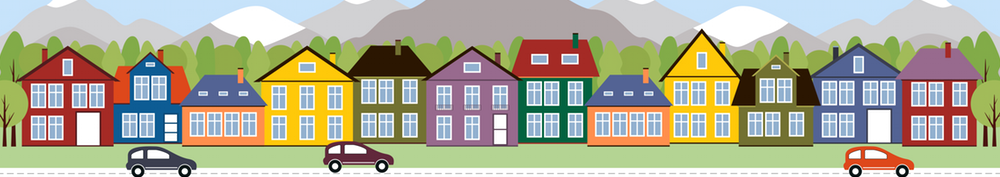

**Performing Data Preparation on the house pricing data set:**

**1) Imputing missing values.**

**2) Transforming numerical values that seem categorical**

**3) Encoding categorical variables**

**4) Feature selection**




In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats
from sklearn.feature_selection import VarianceThreshold


In [2]:
df = pd.read_csv("/content/train.csv")

# Description of Features(Columns) in the training dataset

In [3]:
#with open("/content/data_description.txt") as f:
 # print(f.read())

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.columns = df.columns.str.lower()

For ease, convert all columns to lowercase

In [6]:
print("Total Records:", df.shape[0])
print("Total Features:", df.shape[1])

Total Records: 1460
Total Features: 81


In [7]:
df.tail()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


# Data Processing

**Data Understanding**

* Just by eyeballing at the data, Salesprice is our target variable
* From commonsense, we can say that house Price will be effected more based on the Year Built, Total Square Feet and Overall Quality. This understanding might be wrong. We can infer this by using some metrics like Correlation matrix, Scatter plots etc... We will see their usage and importance later in this notebook.


**i) Analyse SalesPrice**

In [8]:
df['saleprice'].describe()


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: saleprice, dtype: float64

From this it is clear that min house price is 34900(> 0) and max is 755000

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


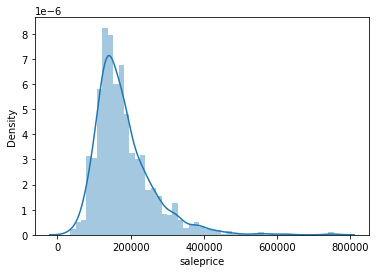

In [9]:
sns.distplot(df['saleprice'])

We can say that, saleprice data is:
* Deviated from the normal distribution
* Has positive skewness
* And shows peakedness

In [10]:
print("Skewness: %f" % df['saleprice'].skew())

Skewness: 1.882876



The rule of thumb seems to be: If the skewness is between -0.5 and 0.5, the data are fairly symmetrical. If the skewness is between -1 and – 0.5 or between 0.5 and 1, the data are moderately skewed. If the skewness is less than -1 or greater than 1, the data are highly skewed.

From this it is clear that saleprice data is highly skewed.

In [11]:
print("Kurtosis: %f" % df['saleprice'].kurt())

Kurtosis: 6.536282


Positive excess values of kurtosis (>3) indicate that a distribution is peaked and possess thick tails. Leptokurtic distributions have positive kurtosis values.

From this, we can say that saleprice data is peaked and has thick tails.

In [12]:
df.columns

Index(['id', 'mssubclass', 'mszoning', 'lotfrontage', 'lotarea', 'street',
       'alley', 'lotshape', 'landcontour', 'utilities', 'lotconfig',
       'landslope', 'neighborhood', 'condition1', 'condition2', 'bldgtype',
       'housestyle', 'overallqual', 'overallcond', 'yearbuilt', 'yearremodadd',
       'roofstyle', 'roofmatl', 'exterior1st', 'exterior2nd', 'masvnrtype',
       'masvnrarea', 'exterqual', 'extercond', 'foundation', 'bsmtqual',
       'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfinsf1',
       'bsmtfintype2', 'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', 'heating',
       'heatingqc', 'centralair', 'electrical', '1stflrsf', '2ndflrsf',
       'lowqualfinsf', 'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath',
       'halfbath', 'bedroomabvgr', 'kitchenabvgr', 'kitchenqual',
       'totrmsabvgrd', 'functional', 'fireplaces', 'fireplacequ', 'garagetype',
       'garageyrblt', 'garagefinish', 'garagecars', 'garagearea', 'garagequal',
       'garagecond', 'paveddrive

**Understanding Relationship of saleprice with grlivarea, overallqual and totalbsmtsf**

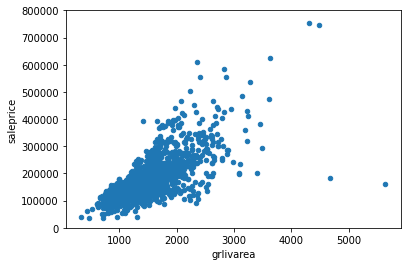

In [13]:
var = 'grlivarea'
data = pd.concat([df['saleprice'], df[var]], axis=1)

data.plot.scatter(x=var, y='saleprice', ylim = (0, 800000))

From the plot, we can infer that saleprice is in a linear relationship with grlivarea.
Here, there are 4 outliers, of those two follow the data linearly. So we can consider two outliers.

In [14]:
df.dtypes[df.dtypes == 'int']

id               int64
mssubclass       int64
lotarea          int64
overallqual      int64
overallcond      int64
yearbuilt        int64
yearremodadd     int64
bsmtfinsf1       int64
bsmtfinsf2       int64
bsmtunfsf        int64
totalbsmtsf      int64
1stflrsf         int64
2ndflrsf         int64
lowqualfinsf     int64
grlivarea        int64
bsmtfullbath     int64
bsmthalfbath     int64
fullbath         int64
halfbath         int64
bedroomabvgr     int64
kitchenabvgr     int64
totrmsabvgrd     int64
fireplaces       int64
garagecars       int64
garagearea       int64
wooddecksf       int64
openporchsf      int64
enclosedporch    int64
3ssnporch        int64
screenporch      int64
poolarea         int64
miscval          int64
mosold           int64
yrsold           int64
saleprice        int64
dtype: object

In [15]:
df['bedroomabvgr']

0       3
1       3
2       3
3       3
4       4
       ..
1455    3
1456    3
1457    4
1458    2
1459    3
Name: bedroomabvgr, Length: 1460, dtype: int64

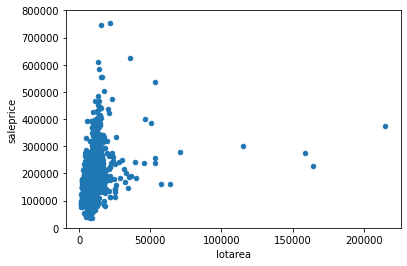

In [16]:
var = 'lotarea'

data = pd.concat([df[var], df['saleprice']], axis = 1)
data.plot.scatter(x=var, y='saleprice', ylim = (0, 800000))

Here, lotarea is also linearly related to saleprice

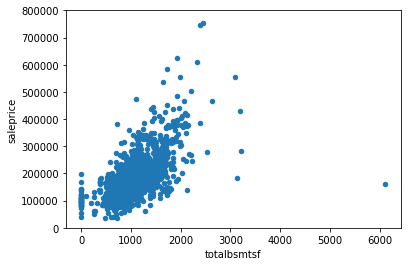

In [17]:
var = 'totalbsmtsf'

data = pd.concat([df[var], df['saleprice']], axis = 1)
data.plot.scatter(x=var, y='saleprice', ylim = (0, 800000))

Even total square feet of basement area is linearly related to saleprice

**Let's see the relationship of saleprice with Overall quality(Categorical feature)**

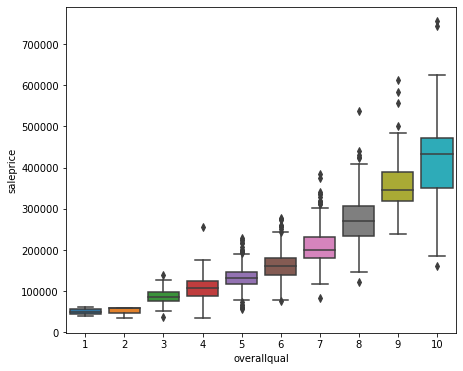

In [18]:
var = 'overallqual'
data = pd.concat([df[var], df['saleprice']], axis=1)

plt.subplots(figsize=(7, 6))
fig = sns.boxplot(x=var, y='saleprice', data = data) 

SalePrice varies based on Overall quality as well

(-0.5, 111.5, 0.0, 800000.0)

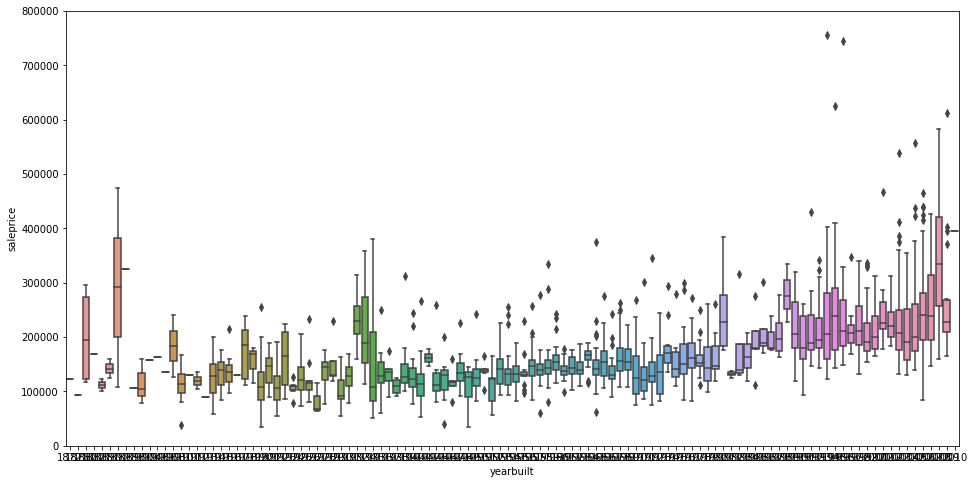

In [19]:
var = 'yearbuilt'

data = pd.concat([df[var], df['saleprice']], axis = 1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y='saleprice', data=data)
fig.axis(ymin=0, ymax=800000)

This seems that price varied mostly for newly built houses

**Till now we saw the relationship of saleprice with other features just by commonsense.**

**Now lets see the relationship of salesprice with all features using corrleation matrix**


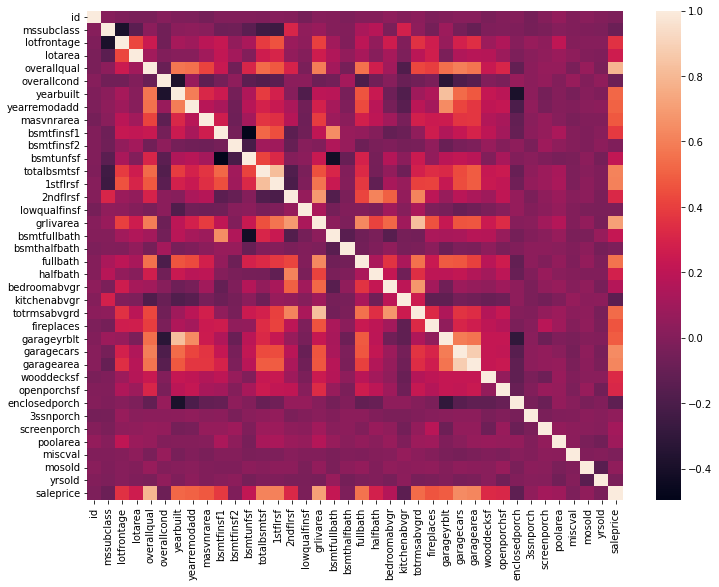

In [20]:
corr_mat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr_mat)

By quick eyeballing, we can say that saleprice is in high correlation with 
* overalqaul
* gvlivarea(Living area sq ft)
* totalbsmtsf(Total sqft of basement area)
* Garagecars
* GarageArea

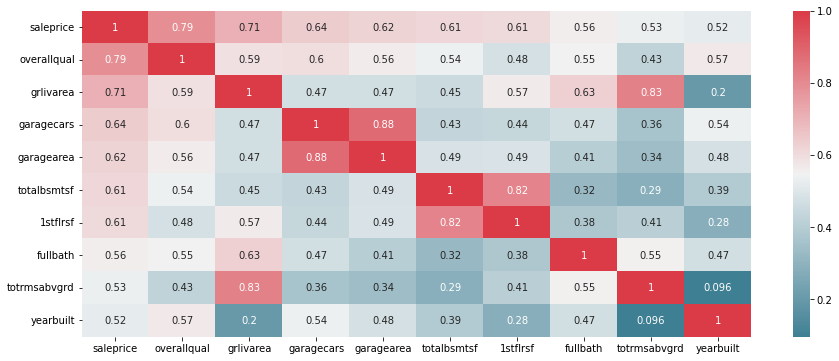

In [21]:
top_featu = corr_mat.nlargest(10, 'saleprice').index

# Create color map ranging between two colours
cmap = sns.diverging_palette(220, 10, as_cmap=True)

coef = np.corrcoef(df[top_featu].T)
plt.subplots(figsize=(15, 6))
sns.heatmap(coef, cmap=cmap, annot=True, xticklabels=top_featu, yticklabels=top_featu)


Top 10 features, saleprice is in high correlation with.

* Saleprice is hightly correlated with Overallqual, grlivarea and totalbsmtsf
* garagecars can be estimated based on garage area. They both belong to same category from my understanding. So lets consider garagecars as it has more coef value.
* totalbsmtsf and 1stflrsf also belong to same family. So let us consider totalbsmtsf.
* grlivarea and totrmabvgrd are also under same category.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


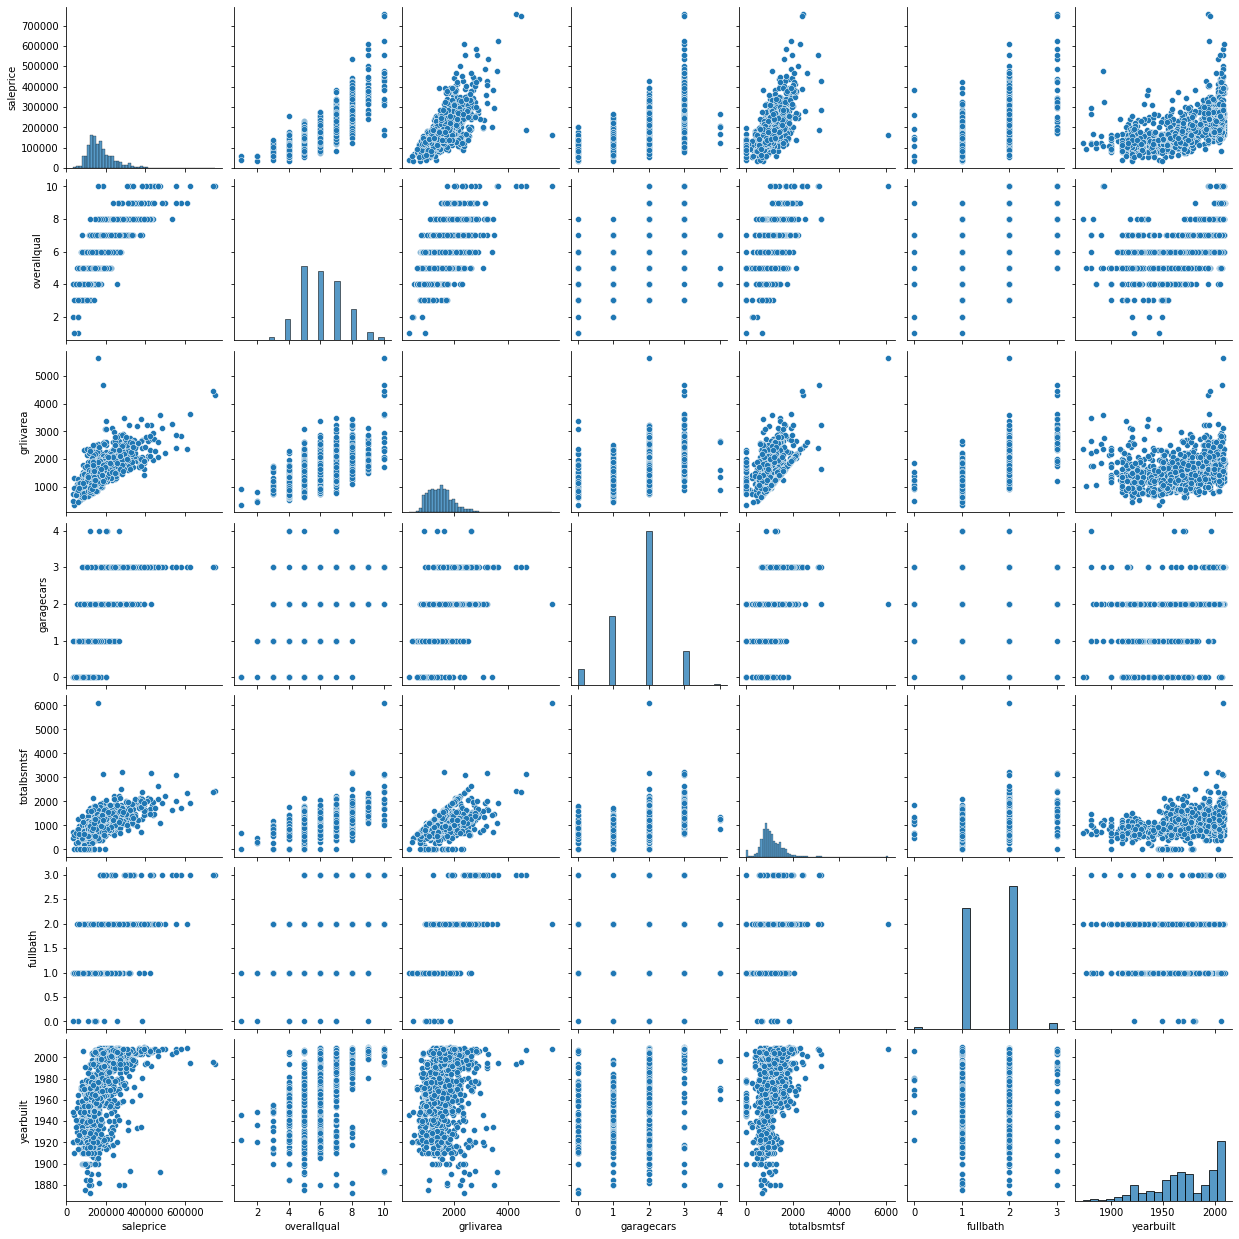

In [22]:
top_feat = ['saleprice', 'overallqual', 'grlivarea', 'garagecars', 'totalbsmtsf', 'fullbath', 'yearbuilt']
sns.pairplot(df[top_feat], size=2.5)

The scatter plot between grlivarea and totalbsmtsf looks interesting.
It looks like a border and all dots lie below that. We can infer that living area above ground is equal to basement area.

# Feature Engineering

**Outliers**

Outliers can affect our model. Inorder to improve the performance, removal of outliers or understanding them is very important.

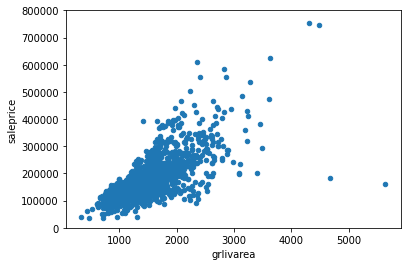

In [23]:
var = 'grlivarea'
data = pd.concat([df[var], df['saleprice']], axis = 1)
data.plot.scatter(x=var, y='saleprice', ylim=(0, 800000))

Two values does not follow the trend and has low price even though the area is large. We can make a guess that these two areas might be agricultural lands. Since we are trying to predict house prices, these values can be removed.
The other top two values are anyhow following the trend, so lets keep them.

In [24]:
df[df['grlivarea'] > 4500].grlivarea

523     4676
1298    5642
Name: grlivarea, dtype: int64

In [25]:
df = df.drop([523, 1298])

In [26]:
df.shape

(1458, 81)

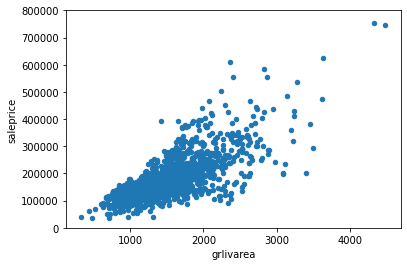

In [27]:
data = pd.concat([df[var], df['saleprice']], axis = 1)
data.plot.scatter(x=var, y='saleprice', ylim=(0, 800000))

The two outliers are removed

**Missing Data**


In [28]:
missing = df.isnull().sum().sort_values(ascending=False)
percent_missing = missing/len(df) * 100
missing_data = pd.concat([missing, percent_missing], axis = 1, keys=['Missing', 'InPercent'])
missing_data.head(20)

,Missing,InPercent
poolqc,1452,99.588477
miscfeature,1404,96.296296
alley,1367,93.758573
fence,1177,80.727023
fireplacequ,690,47.325103
lotfrontage,259,17.764060
garageyrblt,81,5.555556
garagecond,81,5.555556
garagetype,81,5.555556
garagefinish,81,5.555556


Text(0, 0.5, 'Percentage of Missing')

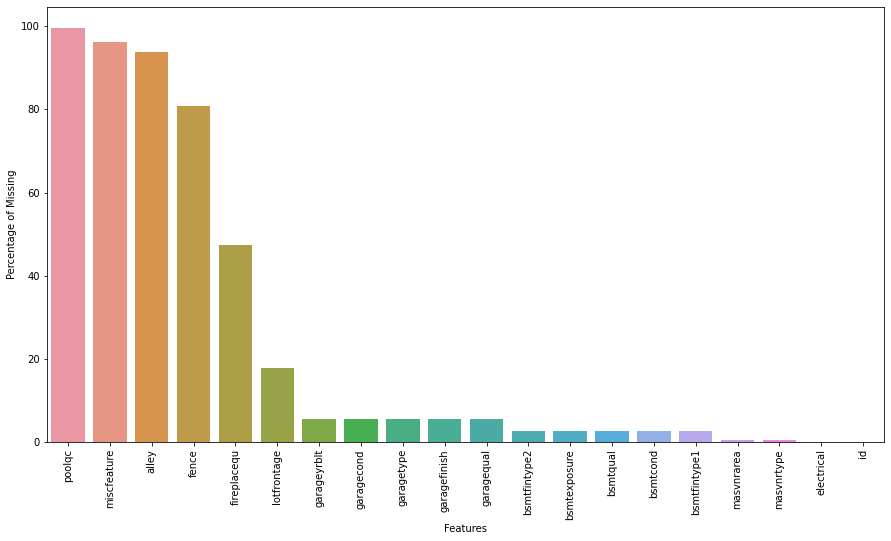

In [29]:
plt.subplots(figsize=(15, 8))
plt.xticks(rotation=90)
sns.barplot(x=missing[:20].index, y=percent_missing[:20].values)
plt.xlabel('Features')
plt.ylabel('Percentage of Missing')

#Imputation

**Impute Missing Values**
There are quite few imputation techniques
* Univariate Impuation(Mean, Median, Mode etc.)
* Multivariate Imputation(MICE)

From the able barplot:
* poolqc(pool availability)
* miscfeature
* alley
* fence etc..
has mssing values

* **poolqc**: 99.5% of missing values, which means max houses doesnt have pool. So we can just ignore this feature or replace Nan with 'None'

In [30]:
df['poolqc'] = df['poolqc'].fillna('None')
df['poolqc'].isnull().sum()

0

* **miscfeature**: 96.3% missing values, which mean there are no misc features to most of the houses. So just fill with None.

In [31]:
df['miscfeature'] = df['miscfeature'].fillna('None')
df['miscfeature'].isnull().sum()

0

* Similarly lets impute **fence, fireplacequ, alley**

In [32]:
df[['fence', 'fireplacequ', 'alley']] = df[['fence', 'fireplacequ', 'alley']].fillna('None')
df[['fence', 'fireplacequ', 'alley']].isnull().sum()

fence          0
fireplacequ    0
alley          0
dtype: int64

* **lotfrontage** missing values can be filled with mean

In [33]:
df['lotfrontage'] = df['lotfrontage'].fillna(df['lotfrontage'].mean())
df['lotfrontage'].isnull().sum()

0

Text(0, 0.5, 'Percentage of Missing')

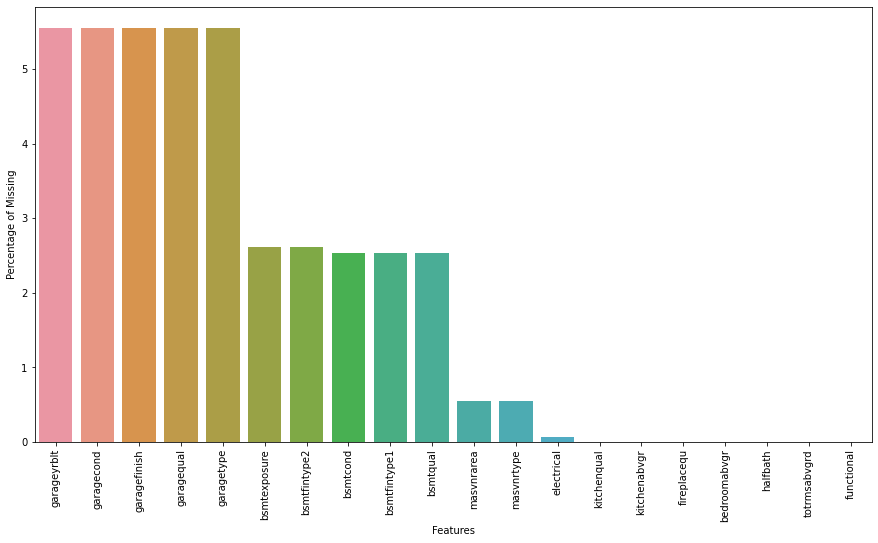

In [34]:
missing = df.isnull().sum().sort_values(ascending=False)
percent_missing = missing/len(df) * 100
missing_data = pd.concat([missing, percent_missing], axis = 1, keys=['Missing', 'InPercent'])
missing_data.head(20)
plt.subplots(figsize=(15, 8))
plt.xticks(rotation=90)
sns.barplot(x=missing[:20].index, y=percent_missing[:20].values)
plt.xlabel('Features')
plt.ylabel('Percentage of Missing')

In [35]:
cols = ['garagecond','garagefinish', 'garagequal', 'garagetype']
df[cols] = df[cols].fillna('None')

In [36]:
cols = ['garageyrblt', 'garagearea', 'garagecars']
df[cols] = df[cols].fillna(0)

In [37]:
df['electrical'].nunique()

5

There are only 5 unique vales in electrical feature

In [38]:
df['electrical'].mode()[0]

'SBrkr'

Of which most of them are 'SBrKr'. So lets impute missing values with most repeated value(mode)

In [39]:
df['electrical'] = df['electrical'].fillna(df['electrical'].mode()[0])

In [40]:
df['electrical'].isnull().sum()

0

In [41]:
df.isnull().sum().sort_values(ascending=False)

bsmtexposure    38
bsmtfintype2    38
bsmtfintype1    37
bsmtqual        37
bsmtcond        37
                ..
exterior2nd      0
exterior1st      0
roofmatl         0
roofstyle        0
saleprice        0
Length: 81, dtype: int64

After applying univariate imputation and filling missing values with None,still there are few Nan's. Now lets use MICE.

Before applying MICE, all the categorical features must be converted to numerical. So lets use LabelEncoder


#LabelEncdoing

In [42]:
from sklearn.preprocessing import LabelEncoder

In [43]:
cols = list(df.dtypes[df.dtypes == 'object'].index)

In [44]:
df_dummy = df.copy()
df_dummy

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,None,Reg,Lvl,AllPub,...,0,None,MnPrv,None,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,None,Reg,Lvl,AllPub,...,0,None,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,4,2010,WD,Normal,142125


In [45]:
for c in cols:
  label = LabelEncoder()
  label.fit(list(df[c].values))
  df_dummy[c] = label.transform(list(df_dummy[c].values))

In [46]:
df_dummy.isnull().sum().sort_values(ascending=False)

masvnrarea      8
id              0
garagefinish    0
garagetype      0
fireplacequ     0
               ..
masvnrtype      0
exterior2nd     0
exterior1st     0
roofmatl        0
saleprice       0
Length: 81, dtype: int64

In [47]:
df_dummy.loc[pd.isna(df['masvnrarea']), :].index

Int64Index([234, 529, 650, 936, 973, 977, 1243, 1278], dtype='int64')

In [48]:
df_dummy['masvnrarea'].iloc[234]

nan

Indices that has null values

# MICE

Now lets impute the null values using MICE

In [49]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor


In [50]:
estimator=RandomForestRegressor(max_depth=8)
mice = IterativeImputer(estimator=estimator,random_state=11,skip_complete=True)

In [51]:
impdata=mice.fit_transform(df_dummy)
impdata=pd.DataFrame(impdata,columns=df.columns)

In [52]:
impdata.isnull().sum().sort_values(ascending=False)

id             0
centralair     0
garageyrblt    0
garagetype     0
fireplacequ    0
              ..
masvnrarea     0
masvnrtype     0
exterior2nd    0
exterior1st    0
saleprice      0
Length: 81, dtype: int64

There are 0 null values

In [53]:
impdata['masvnrarea'].iloc[234]

203.11189465118466

nan was replaced with 171.9

# Normalization


Lets check if **saleprice, grlivarea and totalbsmtsf** are normally distributed.
If not lets normalize them use log scaling.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


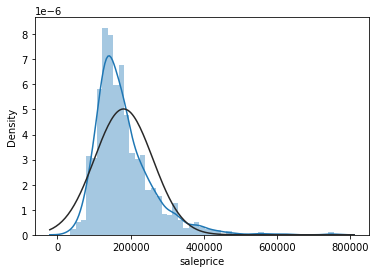

In [54]:
sns.distplot(df['saleprice'], fit=norm)


((array([-3.3047554 , -3.04752042, -2.90446807, ...,  2.90446807,
          3.04752042,  3.3047554 ]),
  array([ 34900,  35311,  37900, ..., 625000, 745000, 755000])),
 (74213.25959976626, 180932.91906721535, 0.9320154492892366))

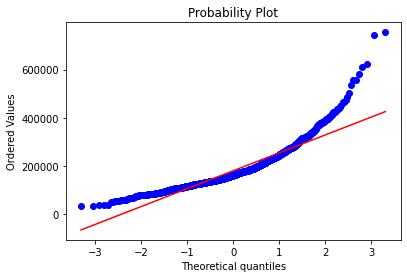

In [55]:
stats.probplot(df['saleprice'], plot = plt)

Saleprice is not normal. It shows peakedness, +ve skewness and does not follow diagonal line.
So lets normalise using log scaling

In [56]:
df['saleprice'] = np.log1p(df['saleprice'])

**After log scaling**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


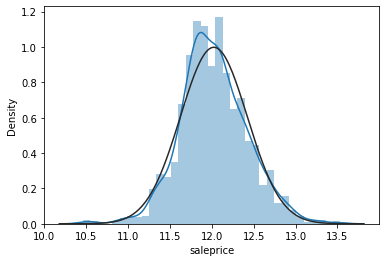

In [57]:
sns.distplot(df['saleprice'], fit=norm)

((array([-3.3047554 , -3.04752042, -2.90446807, ...,  2.90446807,
          3.04752042,  3.3047554 ]),
  array([10.46027076, 10.47197813, 10.54273278, ..., 13.34550853,
         13.52114084, 13.53447435])),
 (0.3985294832980733, 12.024015155682548, 0.9953918721417083))

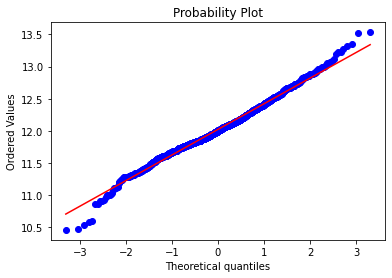

In [58]:
stats.probplot(df['saleprice'], plot=plt)

After normalizing, saleprice data is normally distributed and followed diagonal line with very few deviating

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


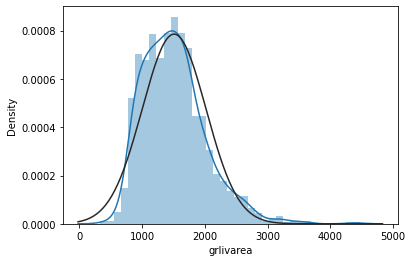

In [59]:
sns.distplot(df['grlivarea'], fit=norm)

((array([-3.3047554 , -3.04752042, -2.90446807, ...,  2.90446807,
          3.04752042,  3.3047554 ]),
  array([ 334,  438,  480, ..., 3627, 4316, 4476])),
 (495.6942381740366, 1510.465706447188, 0.9743965913979763))

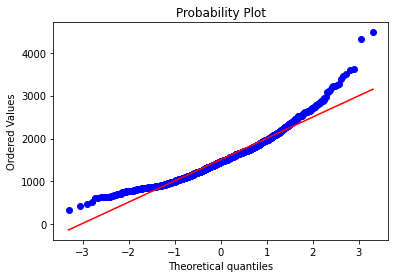

In [60]:
stats.probplot(df['grlivarea'], plot=plt)

In [61]:
df['grlivarea'] = np.log1p(df['grlivarea'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


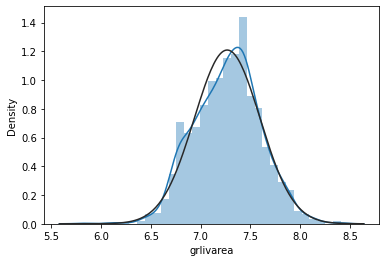

In [62]:
sns.distplot(df['grlivarea'], fit=norm)

((array([-3.3047554 , -3.04752042, -2.90446807, ...,  2.90446807,
          3.04752042,  3.3047554 ]),
  array([5.81413053, 6.08449941, 6.17586727, ..., 8.19643681, 8.370316  ,
         8.40670846])),
 (0.3300724725620917, 7.266761719601684, 0.9981359043958881))

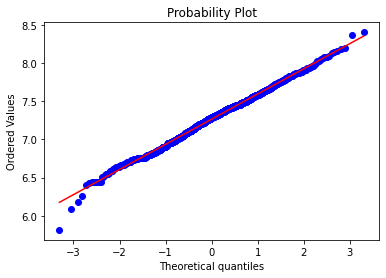

In [63]:
stats.probplot(df['grlivarea'], plot=plt)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


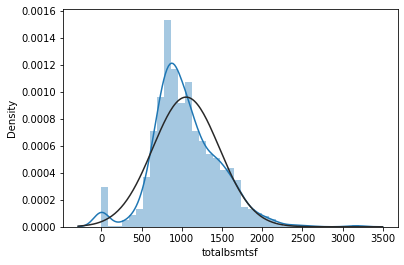

In [64]:
sns.distplot(df['totalbsmtsf'], fit=norm)

((array([-3.3047554 , -3.04752042, -2.90446807, ...,  2.90446807,
          3.04752042,  3.3047554 ]),
  array([   0,    0,    0, ..., 3094, 3200, 3206])),
 (408.3043535992526, 1052.537037037037, 0.9822818887180169))

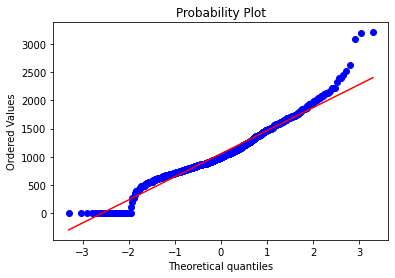

In [65]:
stats.probplot(df['totalbsmtsf'], plot=plt)

#Feature Selection

impdata is the dataset that we use now(all categorical are converted to numerical, missing values are imputed using MICE)

In [66]:
impdata.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1.0,60.0,3.0,65.0,8450.0,1.0,1.0,3.0,3.0,0.0,...,0.0,3.0,4.0,1.0,0.0,2.0,2008.0,8.0,4.0,208500.0
1,2.0,20.0,3.0,80.0,9600.0,1.0,1.0,3.0,3.0,0.0,...,0.0,3.0,4.0,1.0,0.0,5.0,2007.0,8.0,4.0,181500.0
2,3.0,60.0,3.0,68.0,11250.0,1.0,1.0,0.0,3.0,0.0,...,0.0,3.0,4.0,1.0,0.0,9.0,2008.0,8.0,4.0,223500.0
3,4.0,70.0,3.0,60.0,9550.0,1.0,1.0,0.0,3.0,0.0,...,0.0,3.0,4.0,1.0,0.0,2.0,2006.0,8.0,0.0,140000.0
4,5.0,60.0,3.0,84.0,14260.0,1.0,1.0,0.0,3.0,0.0,...,0.0,3.0,4.0,1.0,0.0,12.0,2008.0,8.0,4.0,250000.0


In [67]:
impdata.shape

(1458, 81)

In [68]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [69]:
df_new = impdata.copy()

In [70]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(df_new.drop(['saleprice'], axis=1), 0.8)
print('correlated features: ', len(set(corr_features)) )

correlated features:  5


5 features are 80% correlated.

In [71]:
corr_features

{'1stflrsf', 'exterior2nd', 'garagearea', 'poolqc', 'totrmsabvgrd'}

In [72]:
df_new.drop(labels=corr_features, axis=1, inplace=True)

In [73]:
df_new.shape

(1458, 76)

In [74]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier


In [75]:
y = df_new['saleprice']
X = df_new.drop(['saleprice', 'id'], axis = 1)

In [76]:
# Normalize feature vector
X2 = StandardScaler().fit_transform(X)

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size = 0.30, random_state = 0)

In [78]:
# instantiate the classifier with n_estimators = 100
clf = RandomForestClassifier(n_estimators=100, random_state=0)

In [79]:
# fit the classifier to the training set
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [80]:
# predict on the test set
y_pred = clf.predict(X_test)

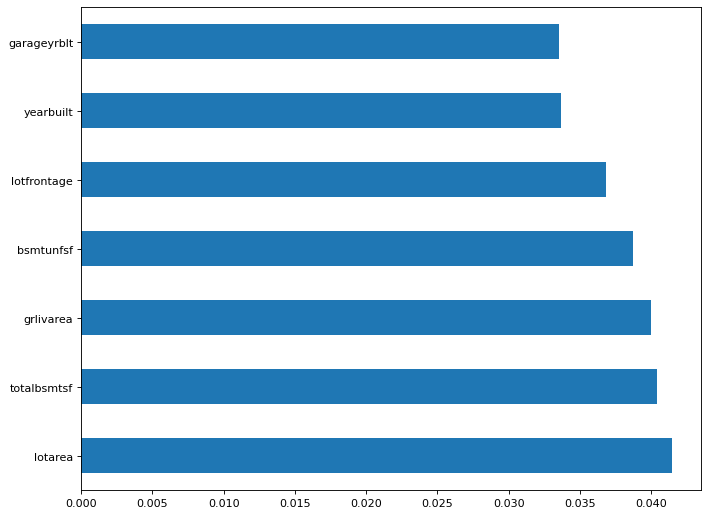

In [81]:
plt.figure(num=None, figsize=(10,8), dpi=80)

feat_importances = pd.Series(clf.feature_importances_, index= X.columns)

feat_importances.nlargest(7).plot(kind='barh')

These are the features that are most important in Random Forest model.



# Using PCA

In [82]:
df_new = impdata.copy()

In [83]:
df_new.shape

(1458, 81)

In [84]:
del df_new['id']

In [85]:
X = df_new.drop(['saleprice'], axis=1)
y = df_new['saleprice']

In [86]:
X.shape

(1458, 79)

In [87]:
from sklearn.decomposition import PCA

In [88]:
pca = PCA(whiten=True)
pca.fit(X)
variance = pd.DataFrame(pca.explained_variance_ratio_)
np.cumsum(pca.explained_variance_ratio_)

array([0.98292462, 0.98773916, 0.9911429 , 0.99395564, 0.99642989,
       0.99840503, 0.99891187, 0.99922589, 0.99948633, 0.99967327,
       0.99981436, 0.9998562 , 0.9998902 , 0.99992113, 0.99994943,
       0.99996519, 0.99997939, 0.99998797, 0.999994  , 0.99999698,
       0.99999903, 0.99999938, 0.99999956, 0.99999964, 0.99999967,
       0.99999969, 0.99999972, 0.99999974, 0.99999976, 0.99999978,
       0.99999979, 0.99999981, 0.99999983, 0.99999984, 0.99999985,
       0.99999986, 0.99999987, 0.99999988, 0.99999989, 0.9999999 ,
       0.99999991, 0.99999992, 0.99999992, 0.99999993, 0.99999994,
       0.99999994, 0.99999995, 0.99999995, 0.99999995, 0.99999996,
       0.99999996, 0.99999997, 0.99999997, 0.99999997, 0.99999997,
       0.99999998, 0.99999998, 0.99999998, 0.99999999, 0.99999999,
       0.99999999, 0.99999999, 0.99999999, 0.99999999, 0.99999999,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     

In [89]:
X.columns

Index(['mssubclass', 'mszoning', 'lotfrontage', 'lotarea', 'street', 'alley',
       'lotshape', 'landcontour', 'utilities', 'lotconfig', 'landslope',
       'neighborhood', 'condition1', 'condition2', 'bldgtype', 'housestyle',
       'overallqual', 'overallcond', 'yearbuilt', 'yearremodadd', 'roofstyle',
       'roofmatl', 'exterior1st', 'exterior2nd', 'masvnrtype', 'masvnrarea',
       'exterqual', 'extercond', 'foundation', 'bsmtqual', 'bsmtcond',
       'bsmtexposure', 'bsmtfintype1', 'bsmtfinsf1', 'bsmtfintype2',
       'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', 'heating', 'heatingqc',
       'centralair', 'electrical', '1stflrsf', '2ndflrsf', 'lowqualfinsf',
       'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath', 'halfbath',
       'bedroomabvgr', 'kitchenabvgr', 'kitchenqual', 'totrmsabvgrd',
       'functional', 'fireplaces', 'fireplacequ', 'garagetype', 'garageyrblt',
       'garagefinish', 'garagecars', 'garagearea', 'garagequal', 'garagecond',
       'paveddrive', 'wo

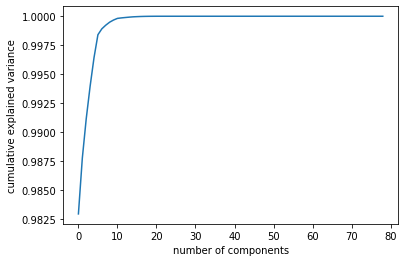

In [90]:
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

From the plot, 

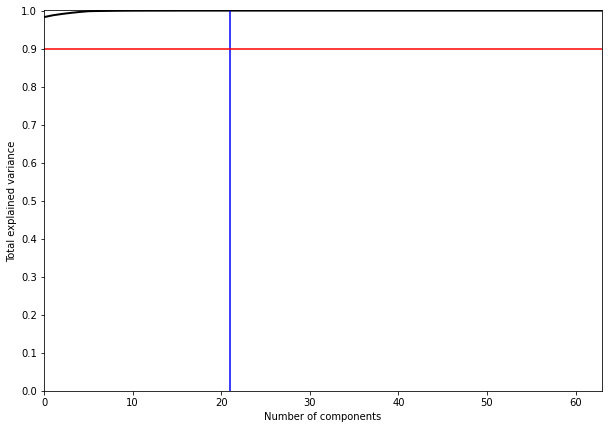

In [91]:
pca = PCA().fit(X)

plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 63)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(21, c='b')
plt.axhline(0.9, c='r')
plt.show();

In [92]:
pca= PCA()
pca.fit(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)
dim = np.argmax(cumsum >= 0.9975) + 1
print('The number of dimensions required to preserve 90% of variance is',dim)


The number of dimensions required to preserve 90% of variance is 6


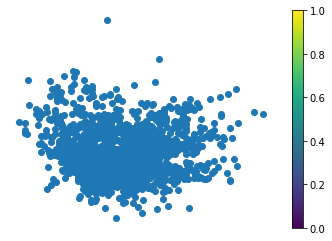

In [93]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_scaled = scaler.fit_transform(X)         
PCA_train_x = PCA(2).fit_transform(train_scaled)
plt.scatter(PCA_train_x[:, 0], PCA_train_x[:, 1], cmap="copper_r")
plt.axis('off')
plt.colorbar()
plt.show()

#Using SVD

In [107]:
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate
from surprise.model_selection import KFold
reader = Reader()

In [108]:
data = Dataset.load_from_df(df_new[['lotarea', 'grlivarea', 'totalbsmtsf']], reader)
kf = KFold(n_splits=5)
kf.split(data)

<generator object KFold.split at 0x7f2c3a20bbd0>

In [109]:
svd = SVD()
cross_validate(svd, data, measures=['RMSE', 'MAE'])

{'test_rmse': array([1104.2144468 , 1111.02945598, 1147.14951671, 1130.97212085,
        1139.56680441]),
 'test_mae': array([1027.22260274, 1034.1369863 , 1052.63013699, 1053.62886598,
        1071.46391753]),
 'fit_time': (0.24684762954711914,
  0.26500964164733887,
  0.15903687477111816,
  0.07782220840454102,
  0.07708549499511719),
 'test_time': (0.016254663467407227,
  0.0036513805389404297,
  0.0022437572479248047,
  0.002173900604248047,
  0.0028700828552246094)}

In [110]:
trainset = data.build_full_trainset()
svd.fit(trainset)

In [113]:
df_new[df_new['lotarea'] == 9600]

,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,lotconfig,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
1,20.0,3.0,80.0,9600.0,1.0,1.0,3.0,3.0,0.0,2.0,...,0.0,3.0,4.0,1.0,0.0,5.0,2007.0,8.0,4.0,181500.0
155,50.0,3.0,60.0,9600.0,1.0,1.0,3.0,3.0,0.0,0.0,...,0.0,3.0,4.0,1.0,0.0,4.0,2008.0,8.0,4.0,79000.0
273,20.0,3.0,80.0,9600.0,1.0,1.0,3.0,3.0,0.0,4.0,...,0.0,3.0,2.0,1.0,0.0,4.0,2009.0,8.0,4.0,139000.0
294,20.0,3.0,80.0,9600.0,1.0,1.0,3.0,3.0,0.0,4.0,...,0.0,3.0,4.0,1.0,0.0,10.0,2009.0,8.0,4.0,167000.0
314,70.0,4.0,60.0,9600.0,1.0,0.0,3.0,3.0,0.0,4.0,...,0.0,3.0,4.0,1.0,0.0,8.0,2006.0,8.0,4.0,178000.0
455,20.0,3.0,80.0,9600.0,1.0,1.0,3.0,3.0,0.0,4.0,...,0.0,3.0,4.0,1.0,0.0,9.0,2007.0,8.0,4.0,175500.0
485,20.0,3.0,80.0,9600.0,1.0,1.0,3.0,3.0,0.0,4.0,...,0.0,3.0,4.0,1.0,0.0,7.0,2009.0,8.0,4.0,147000.0
508,70.0,4.0,60.0,9600.0,1.0,1.0,3.0,3.0,0.0,4.0,...,0.0,3.0,4.0,1.0,0.0,10.0,2008.0,8.0,4.0,161000.0
509,20.0,3.0,80.0,9600.0,1.0,1.0,3.0,3.0,0.0,0.0,...,0.0,3.0,2.0,1.0,0.0,7.0,2009.0,8.0,4.0,124500.0
626,80.0,3.0,80.0,9600.0,1.0,1.0,3.0,3.0,0.0,4.0,...,0.0,3.0,4.0,1.0,0.0,3.0,2010.0,8.0,4.0,153000.0


In [115]:
svd.predict(9600, 9600, 9600)

Prediction(uid=9600, iid=9600, r_ui=9600, est=5, details={'was_impossible': False})